# Analysis of Resturants in Swiggy Banglore

## Data Processing

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df = pd.read_csv('Swiggy Bangalore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10297 entries, 0 to 10296
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Restaurant Name           10297 non-null  object 
 1   Category                  10297 non-null  object 
 2   Rating                    1499 non-null   float64
 3   Cost for Two (in Rupees)  10297 non-null  int64  
 4   Area                      10297 non-null  object 
 5   Offer                     0 non-null      float64
 6   URL                       10297 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 563.2+ KB


In [4]:
df.describe()

,Rating,Cost for Two (in Rupees),Offer
count,1499.000000,10297.000000,0.0
mean,3.669380,305.419540,NaN
std,0.231851,184.257752,NaN
min,3.000000,1.000000,NaN
25%,3.500000,200.000000,NaN
50%,3.700000,250.000000,NaN
75%,3.900000,350.000000,NaN
max,3.900000,3500.000000,NaN


In [5]:
df.head()

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area,Offer,URL
0,Khichdi Paradise,"Home Food, Desserts, Beverages, Healthy Food",NaN,250,Arekere,NaN,https://www.swiggy.com/restaurants/khichdi-par...
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere,NaN,https://www.swiggy.com/restaurants/home-plate-...
2,THE GRILL & CO.,"Indian, Tandoor, Biryani",NaN,300,Arekere,NaN,https://www.swiggy.com/restaurants/the-grill-a...
3,555 Darjeeling Unique Asian Cuisine,Asian,NaN,300,Arekere,NaN,https://www.swiggy.com/restaurants/555-darjeel...
4,Momo Guy,"Asian, Tibetan, Desserts, Beverages",NaN,200,Arekere,NaN,https://www.swiggy.com/restaurants/momo-guy-jp...


## Data Cleaning

### Deleting two un-necessary columns: Offer and URL

In [6]:
df.drop(['Offer', 'URL'], inplace =  True, axis = 1)
df.head()

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area
0,Khichdi Paradise,"Home Food, Desserts, Beverages, Healthy Food",NaN,250,Arekere
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere
2,THE GRILL & CO.,"Indian, Tandoor, Biryani",NaN,300,Arekere
3,555 Darjeeling Unique Asian Cuisine,Asian,NaN,300,Arekere
4,Momo Guy,"Asian, Tibetan, Desserts, Beverages",NaN,200,Arekere


### Removing Null Values in rows

In [7]:
df.dropna(axis = 0, inplace = True)
df.head(10)

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere
17,New Kabab Zone,"North Indian, Chinese, Biryani",3.9,250,Arekere
22,Crown Restaurant,"Indian, Chinese",3.7,300,Arekere
30,Thakkali Kitchens,"Kerala, South Indian, Indian, Chinese",3.8,399,Arekere
50,Ishta Cafe - Millet Pizzas,"Pizzas, Salads, Beverages, Healthy Food",3.7,400,Arekere
55,New Udupi Veg,"South Indian, Chinese, Chaat, North Indian",3.7,200,Arekere
60,GUNDU PALAV SGS NON VEG - ORIGINAL,Indian,3.4,200,Arekere
63,Dindigul Thalappakatti,"Biryani, Barbecue, Chinese, North Indian, Sout...",3.8,650,Arekere
67,KFC,"American, Snacks",3.9,400,Arekere
69,Soup Station,"Continental, Healthy Food",3.8,300,Arekere


In [8]:
# Renaming to columns: Resturant Name to Resturant and Cost for Two (in Rupees) to Cost for Two:

df.rename(columns={'Restaurant Name':'Resturant', 'Cost for Two (in Rupees)':'Cost for Two'}, inplace = True)
df.head()

,Resturant,Category,Rating,Cost for Two,Area
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere
17,New Kabab Zone,"North Indian, Chinese, Biryani",3.9,250,Arekere
22,Crown Restaurant,"Indian, Chinese",3.7,300,Arekere
30,Thakkali Kitchens,"Kerala, South Indian, Indian, Chinese",3.8,399,Arekere
50,Ishta Cafe - Millet Pizzas,"Pizzas, Salads, Beverages, Healthy Food",3.7,400,Arekere


### Sort Resturants based on Ratings

In [9]:
rating_order = df.sort_values(['Rating'], ascending = False)
rating_order.head()

,Resturant,Category,Rating,Cost for Two,Area
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere
7504,Big Bowl Company,"Chinese, Snacks",3.9,250,Marathahalli
7414,South Ruchis Square,"Biryani, Chinese, Desserts, Fast Food, Jain, N...",3.9,500,Majestic
2023,Behrouz Biryani,"Biryani, Mughlai, Lucknowi, Hyderabadi, Kebabs...",3.9,500,CV Raman Nagar
2017,Tawakkal mubarak hotel,"Indian, Biryani",3.9,500,CV Raman Nagar


## Data Visualization

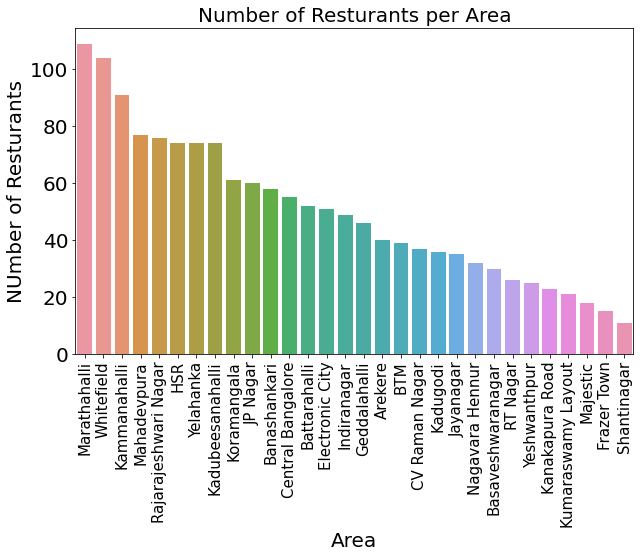

In [10]:
# Number of Swiggy Listed Resturants in Banglore:

plt.figure(figsize=(10,6))
cx = sns.countplot('Area', data=rating_order, order= rating_order.Area.value_counts().index)
plt.title('Number of Resturants per Area', fontsize = 20)
plt.xlabel('Area', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.ylabel('NUmber of Resturants', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show;

#### Maximum number of Resturants partnership with Swiggy is in 'Marathahalli', and 'Whitefield' : Above 100 Nos;
#### And minimum number is in 'Majestic', 'Frazer town' and 'Shanthinagar' : Below 20 Nos

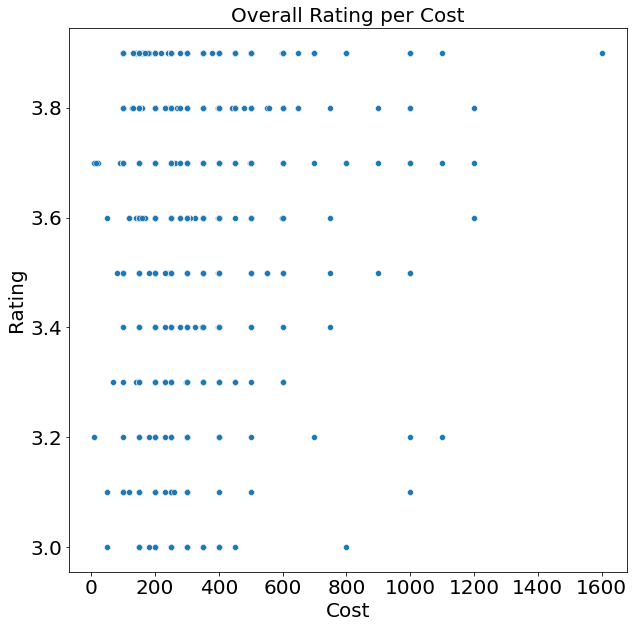

In [11]:
# Ratings given by customers, comparing with cost of food:
plt.figure(figsize=(10,10))
ax = sns.scatterplot('Cost for Two','Rating', data=rating_order)
plt.title('Overall Rating per Cost', fontsize = 20)
plt.xlabel('Cost', fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Rating', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show;

#### Maximum number of Ratings given by the customers for the cost of food in between 100 and 500

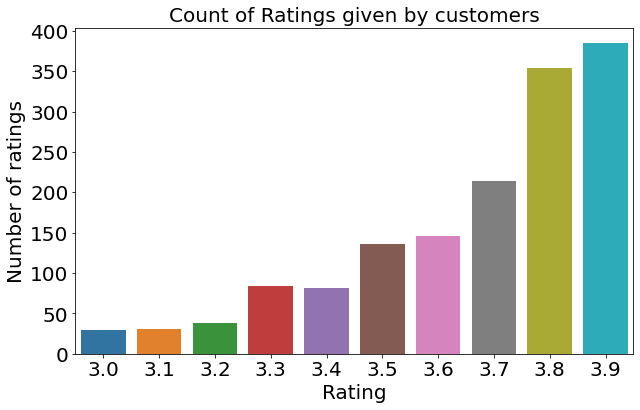

In [12]:
# Number of Ratings given by Customers:

plt.figure(figsize=(10,6))
bx = sns.countplot('Rating', data=rating_order)
plt.title('Count of Ratings given by customers', fontsize = 20)
plt.xlabel('Rating', fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Number of ratings', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show;

#### Majority of the customers who gave the ratings above 3.7

In [24]:
# Best Restuarants
max_rating = rating_order[rating_order['Rating']==3.9]
max_rating

,Resturant,Category,Rating,Cost for Two,Area
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere
7504,Big Bowl Company,"Chinese, Snacks",3.9,250,Marathahalli
7414,South Ruchis Square,"Biryani, Chinese, Desserts, Fast Food, Jain, N...",3.9,500,Majestic
2023,Behrouz Biryani,"Biryani, Mughlai, Lucknowi, Hyderabadi, Kebabs...",3.9,500,CV Raman Nagar
2017,Tawakkal mubarak hotel,"Indian, Biryani",3.9,500,CV Raman Nagar
...,...,...,...,...,...
8956,KOLKATA VICTORIA CHAT HOUSE,"Snacks, Indian",3.9,169,RT Nagar
8902,Dastarkhwan-E-Khas,"Biryani, Beverages, Kebabs, Use Code PUNE100 t...",3.9,200,RT Nagar
9187,Barbeque Nation,"North Indian, Barbecue, Biryani, Kebabs, Mughl...",3.9,600,Whitefield
8923,The Empire Juice Shop,"Ice Cream, Juices",3.9,200,RT Nagar


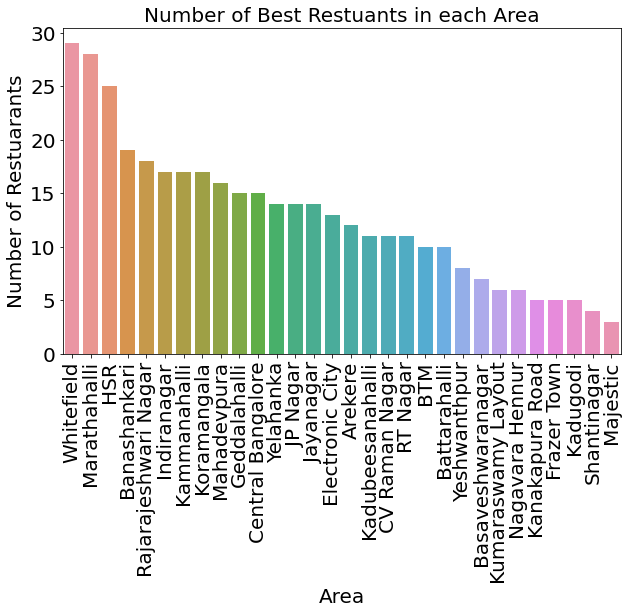

In [30]:
# Number of Best restuarants in Area
plt.figure(figsize=(10,6))
bx = sns.countplot('Area', data=max_rating, order=max_rating.Area.value_counts().index)
plt.title('Number of Best Restuants in each Area', fontsize = 20)
plt.xlabel('Area', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.ylabel('Number of Restuarants', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show;

Highest number of best restuarants (Rating = 3.9) is in Whitefield